In [1]:
import pandas as pd
import numpy as np
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("Mall_Customers.csv")

In [3]:
data.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [4]:
data['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
data['Gender']=data['Gender'].map({'Female':0,'Male':1}).astype(int)

In [6]:
df = pd.DataFrame(data)

In [7]:
df_clustering = df.drop('CustomerID', axis=1)

In [8]:
features = ['Age', 'Annual Income (k$)', 'Spending Score (1-100)']
X = data[features]

In [9]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_clustering)

In [10]:
def find_optimal_clusters(data, max_k):
    inertia = []
    for k in range(1, max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        inertia.append(kmeans.inertia_)
    return inertia

In [11]:
inertia = find_optimal_clusters(df_scaled, 10)

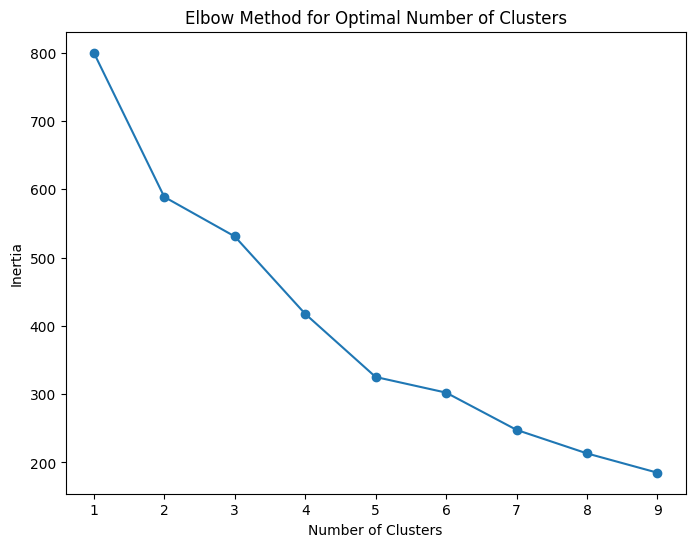

In [12]:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 10), inertia, marker='o')
plt.title('Elbow Method for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Inertia')
plt.show()

In [13]:
optimal_clusters = 5
kmeans = KMeans(n_clusters=optimal_clusters)
df['Cluster'] = kmeans.fit_predict(df_scaled)

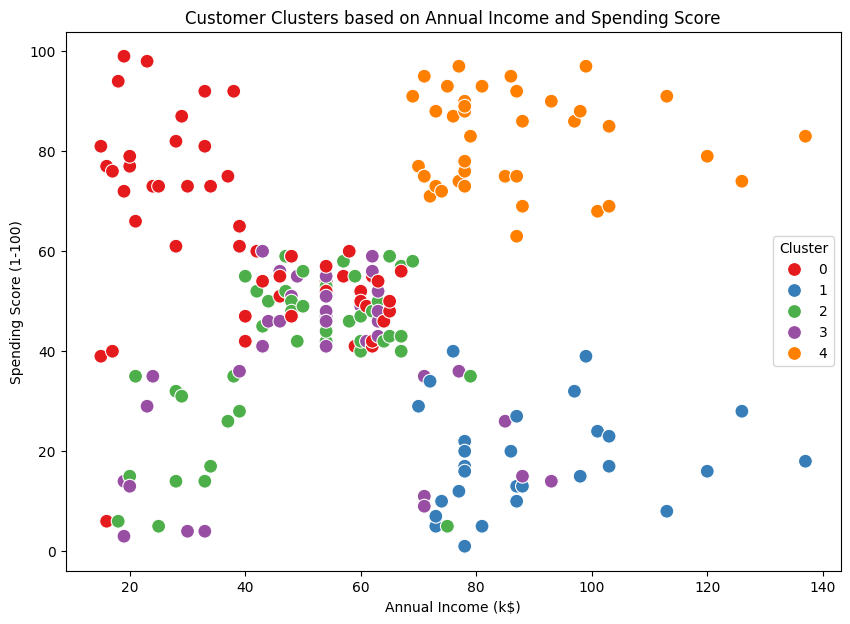

In [14]:
plt.figure(figsize=(10, 7))
sns.scatterplot(x=df['Annual Income (k$)'], y=df['Spending Score (1-100)'], hue=df['Cluster'], palette='Set1', s=100)
plt.title('Customer Clusters based on Annual Income and Spending Score')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.show()

In [15]:
cluster_summary = df.groupby('Cluster').mean().reset_index()
print("Note: 1 represents Male and 0 represents Female")
print(cluster_summary.to_string(index=False))

# Save the clustered data
data.to_csv('clustered_customers.csv', index=False) 

Note: 1 represents Male and 0 represents Female
 Cluster  CustomerID   Gender       Age  Annual Income (k$)  Spending Score (1-100)
       0   53.415094 0.396226 24.716981           40.018868               61.698113
       1  165.482759 0.448276 36.482759           89.517241               18.000000
       2   73.651163 0.000000 49.813953           49.232558               40.069767
       3   82.916667 1.000000 55.138889           52.861111               36.722222
       4  162.000000 0.461538 32.692308           86.538462               82.128205
